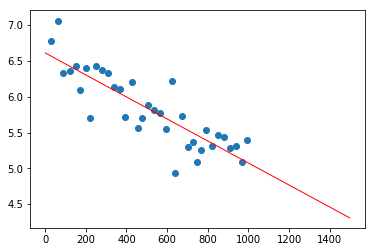

0.7354444384211034 [[-0.00153657]]


In [53]:
'''
p.21
Example 1-1
Instead of predicting boring fake OECD data, lets  use some real world oil and gas data
from: South Dakota (https://denr.sd.gov/des/og/producti.aspx)
'''

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

#load data

ozark_prod = pd.read_csv("oil_prod/Ozark.csv")

#prepare an convert Data to numpy

#convert production days into cumulative time axis

len_ozark_prod = ozark_prod.shape[0]
cumul_time = ozark_prod.iloc[0,0]


for i in range(1,len_ozark_prod,1):
    ozark_prod.iloc[i,0] = ozark_prod.iloc[i-1,0] + ozark_prod.iloc[i,0]

    
X = np.c_ [ozark_prod["Prod_Days"]].reshape(-1,1)
y = np.log (np.c_ [ozark_prod["Oil_bbls"]].reshape(-1,1)) #exponential decline -> use log




#construct linear model

reg = LinearRegression().fit(X, y)
matching_score = reg.score(X, y)  

X_future = np.arange(1,1500,1)

plt.scatter(X,y)
plt.plot(X_future.reshape(-1,1), reg.predict(X_future.reshape(-1,1)), color='red', 
         linewidth=1)
plt.show()

print (matching_score, reg.coef_)

